There are many ways to create codes using the framework. These include

1. Coding a symplectic matrix
2. Providing the stabilizer/gauge generators as strings
3. Loading a code via the codebase libraries
4. Configuring and running a TileCodeFactory
5. Configuring and running a specific CodeBuilder

1. Coding a symplectic matrix:

We first consider creating the 7-qubit Steane/color code:

<image of a 7-qubit Steane code>


In [1]:
import numpy as np
from qiskit_qec.structures.gauge import GaugeGroup
from qiskit_qec.operators.pauli_list import PauliList
from qiskit_qec.codes.stabsubsystemcodes import StabSubSystemCode

# Create the 7-qubit Steane/color code
matrix = np.array(
    [
        [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
        [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1],
    ]
)

generators = PauliList(matrix)
gauge_group = GaugeGroup(generators)
code = StabSubSystemCode(gauge_group)

2. Providing the stabilizer/gauge generators as strings


In [11]:
# The default reads product sytnax Paulis from right-to-left
generators = PauliList(["IIIXXXX", "IIIZZZZ", "IXXXIXI", "IZZZIZI", "XIXIIXX", "ZIZIIZZ"])
gauge_group = GaugeGroup(generators)
code = StabSubSystemCode(gauge_group)

In [9]:
generators = PauliList(["X0X1X2X3", "Z0Z1Z2Z3", "X1X3X4X5", "Z1Z3Z4Z5", "X0X1X4X6", "Z0Z1Z4Z6"])
gauge_group = GaugeGroup(generators)
code = StabSubSystemCode(gauge_group)

3. Loading a code via the codebase libraries

In [4]:
import qiskit_qec.codes.codebase as cb
import qiskit_qec.utils.pauli_rep as pauli_rep

# This will set the default output format to index format and read product syntax
# Pauli strings from left-to-right
from qiskit_qec.operators.base_pauli import BasePauli

BasePauli.set_syntax(pauli_rep.INDEX_SYNTAX)
BasePauli.set_qubit_order("left-to-right")

In [5]:
# Load the code with n=5, k=0 and the index = 1 then show its generators
code = cb.small_code(5, 0, 1)
code.gauge_group.generators

PauliList(['X1', 'X2', 'X3', 'Z0Z4', 'Y0Y4'])

In [20]:
# Load the code with n=5, k=0 and index=4 but only fetch the information on it
codes = cb.small_code(5, 0, 4, info_only=True)
codes.info

[[5,0]]-4 of type StabSubSystemCode
-------------------------------------------------------------------------------
isotropic_generators : ['Z1Z2', 'Z0Z4', 'Y1Y2X3', 'Z0Z1Z3', 'Y0X3Y4']
is_subsystem         : 1
index                : 4
code_type            : StabSubSystemCode
aut_group_size       : 32
is_triorthogonal     : 0
is_decomposable      : 0
weight_enumerator    : [1, 0, 2, 8, 13, 8]
is_css               : 1
uuid                 : 33f790cd-ab06-47fb-a2b3-057f38329942
is_degenerate        : 0
d                    : 2
is_gf4linear         : 0
k                    : 0
n                    : 5



In [23]:
# Load all (1) small codes info with n=5 and k=2 that are not CSS with d=2
codes = cb.all_small_codes(5, 2, is_css=False, info_only=True, d=2)
code.info

[[5,2]]-36 of type StabSubSystemCode
-------------------------------------------------------------------------------
isotropic_generators : ['X1Z2Z3', 'Y0Y1X3', 'Z0Z1X2Z4']
logical_ops          : ['Z0Z1X3', 'Z2X4', 'Z0Z3', 'Z4']
is_subsystem         : 1
index                : 36
code_type            : StabSubSystemCode
aut_group_size       : 8
is_decomposable      : 0
weight_enumerator    : [1, 0, 0, 2, 3, 2]
is_css               : 0
uuid                 : 712505a9-19ed-4702-ba25-d2270317afaa
is_degenerate        : 0
d                    : 1
is_gf4linear         : 0
k                    : 2
n                    : 5



4. Configuring and running a TileCodeFactory

We again consider building the Steane/color code or more generally the triangular color code.

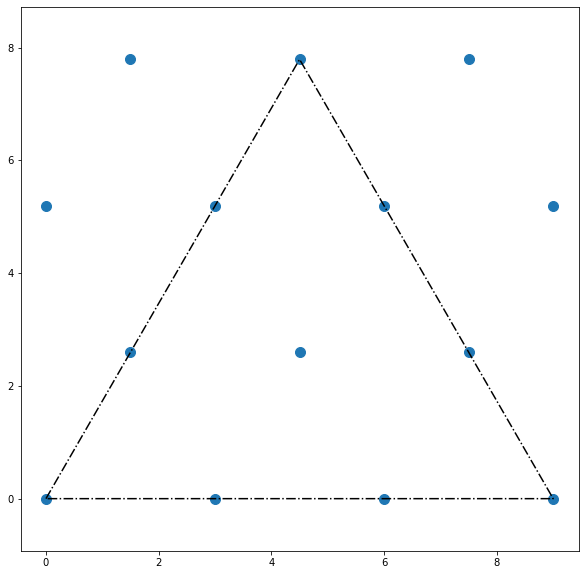

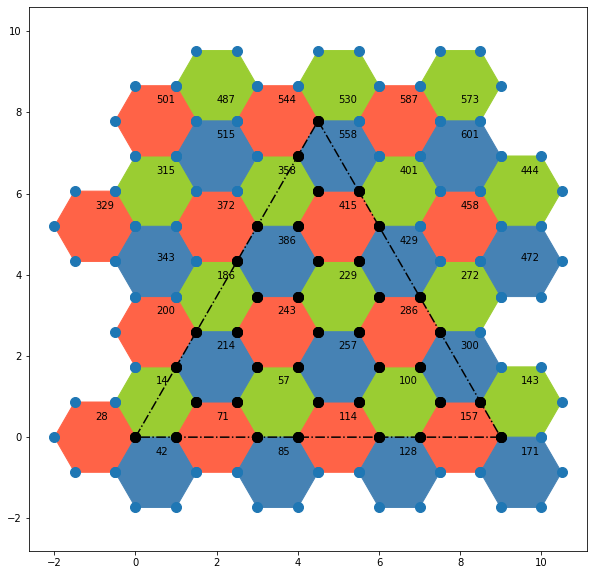

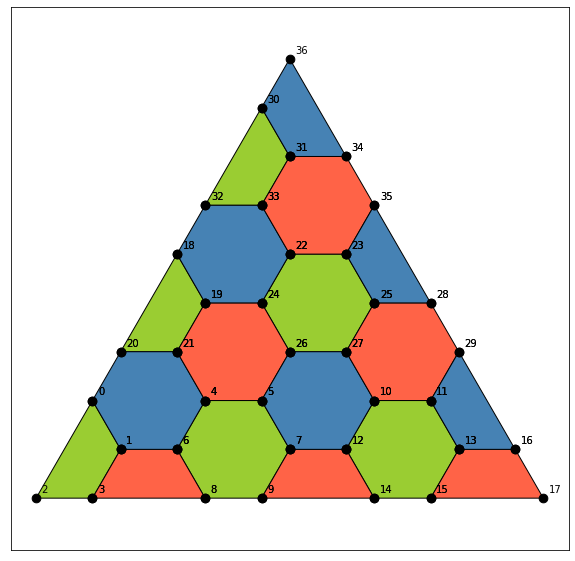

In [1]:
# Set distance
d = 7

# Load the appropriate tile: Hexagon Tile
from qiskit_qec.geometry.tiles.hexagontile import HexagonTile

# Load the Shape class to create a triangular cutter
from qiskit_qec.geometry.shape import Shape

# Load the TileCodeFactory
from qiskit_qec.codes.codefactory.tilecodefactory import TileCodeFactory

# Load the minifold to be tiled
from qiskit_qec.geometry.plane import Plane

# Load the lattive class to tile against
from qiskit_qec.geometry.lattice import Lattice

# Create a code factory
triangular_code_factory = TileCodeFactory()

## Set the factory parameters

# Set the manifold
manifold = Plane()

# Set the tile and tile parameters
tile = HexagonTile
tile_optype = "dXZ"  # Choose both X and Z stabilizers for each hexagon (predefined setting)

# Set the lattice to tile
lattice = Lattice(u_vec=HexagonTile.u_vec, v_vec=HexagonTile.v_vec)

# Set the length of the sides of the triangular cutter
scale = 3 * (d - 1) / 2

# Define the set of points defining the triangle
points = [[0, 0], [scale * HexagonTile.h, scale * HexagonTile.r], [scale, 0]]

# Create the triangular cutter and cutter parameters
cutter = Shape(points=points)
on_boundary = True  # Choose to include points on (or very near to) the cutter boundary
boundary_strategy = "combine"  # Choose how to combine separate peices of cut gauge operators
levels = [4, 6]  # Only include weight 4 and 6 operators after cutter from tiling

# Set to display intermediate views to allow for correction configuration errors
show_face_colors = True  # As each face as two operators (X and Z) use face colors
show_inside = True  # Show which qubits are inside the cutter
lattice_view = True  # Show the lattice view
precut_tiling_view = True  # Show the tiling before cutting

# Configure the code factory
triangular_code_factory.set_parameters(
    manifold=manifold,
    tile=tile,
    lattice=lattice,
    cutter=cutter,
    on_boundary=on_boundary,
    boundary_strategy=boundary_strategy,
    levels=levels,
    tile_optype=tile_optype,
    show_face_colors=show_face_colors,
    show_inside=show_inside,
    lattice_view=lattice_view,
    precut_tiling_view=precut_tiling_view,
)

# Update the factory is_configure check. This is used since we
# directly updated the TileCodeFactory configuration instead of
# using the individual TileCodeFactory configuration methods.
triangular_code_factory.update_is_configure()

# Create the base triangular color code
code = triangular_code_factory.make_code()

# View the code produced, using face colors and who qubit_indexs
code.draw(face_colors=True, show_index=True)

5. Configuring and running a specific CodeBuilder

The previous approach can be wrapped into a builder class. In this case
a triangular code code builder

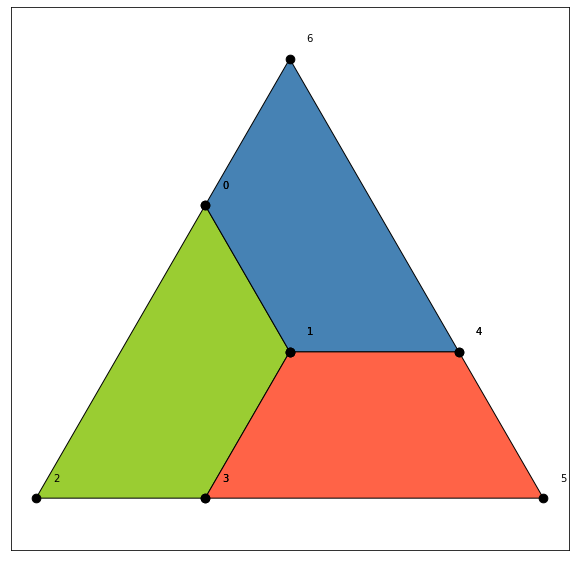

In [2]:
from qiskit_qec.codes.codebuilders.triangular_color_code_builder import TriangularColorCodeBuilder

code = TriangularColorCodeBuilder(d=3).build()
code.draw(face_colors=True, show_index=True)

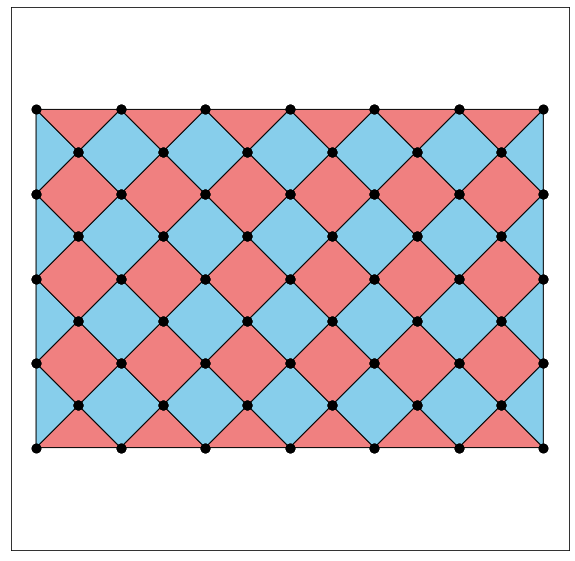

In [3]:
from qiskit_qec.codes.codebuilders.surface_code_builder import SurfaceCodeBuilder

code = SurfaceCodeBuilder(dx=5, dz=7).build()
code.draw(face_colors=False, xcolor="lightcoral", zcolor="skyblue")

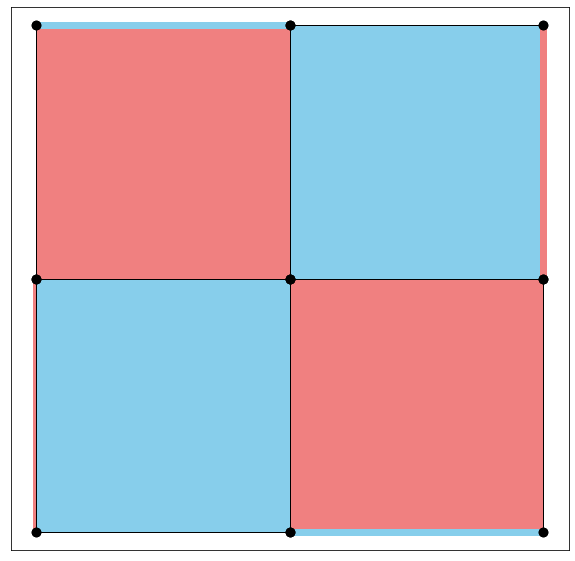

In [4]:
from qiskit_qec.operators.pauli import Pauli
from qiskit_qec.codes.codebuilders.rotated_surface_code_builer import RotatedSurfaceCodeBuilder

code = RotatedSurfaceCodeBuilder(d=3, ul_op=Pauli("X")).build()
code.draw(face_colors=False, xcolor="lightcoral", zcolor="skyblue")

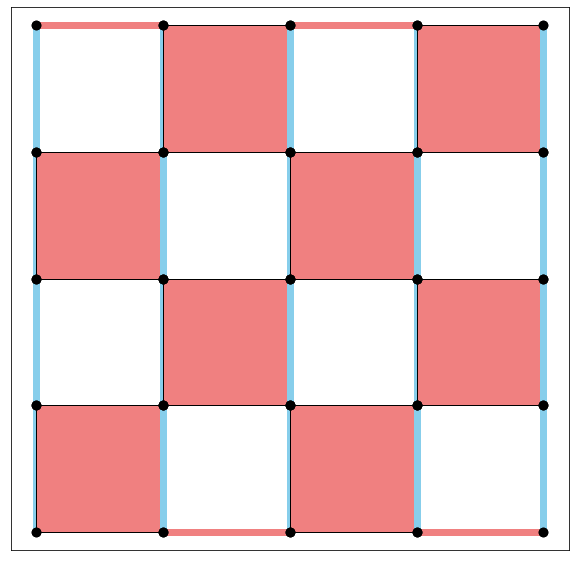

In [5]:
from qiskit_qec.codes.codebuilders.heavyhex_code_builder import HeavyHexCodeBuilder

code = HeavyHexCodeBuilder(d=5).build()
code.draw(face_colors=False, xcolor="lightcoral", zcolor="skyblue")